## Assumptions:

● The height and width of each rectangular section is sampled from a 
uniform distribution.

● Positions of the windows are also determined by uniform random 
distribution.

● When a new tower comes online, if its coverage rectangle intersects the pre-existing
composite footprint, then that new tower’s coverage is trimmed such that its maximum remaining coverage area is retained (see sequential diagram below).


In [ ]:
def calc_coverage(sizeX,sizeY,n):
    '''
    Given an overall desired coverage footprint and a sequence of n communications towers, 
    what is the resulting resolved coverage?
    
    :param sizeX: width of overall desired coverage footprint
    :type sizeX: int
    :param sizeY: height of overall desired coverage footprint
    :type sizeY: int
    :param n: number of communications towers
    :returns: area of resulting resolved coverage
    '''
    
    assert isinstance(sizeX, int)
    assert isinstance(sizeY, int)
    assert isinstance(n, int)
    assert sizeX > 0 and sizeY > 0 
    
    import random
    import numpy as np
    
    
    list1 = [0 for d in range(sizeX)]
    matrix = [list1 for d in range(sizeY)]
        
    for i in range(n):
        posX = random.randint(1, sizeX)
        posY = random.randint(1, sizeY)
        width = random.randint(1, sizeX)
        height = random.randint(1, sizeY)
        
        if i == 0:
            matrix[posX][posY:posY+height] = 1
        
        

## Algorithm:
    1. Based on input sizeX, sizeY, create corresponding size matrix, filled with all 0s at first.
    2. Every time a rectangle is put on footprint, add 1 to all the covered area. 
    For example, if the original footprint is 6x6, it looks like:
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    First, a 1x4 rectangle is placed in middle:
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 1 1 1 1 0
    0 0 0 0 0 0
    The above matrix would be currentmap, the first input of trim_overlap. 
    
    Then, when the second rectangle 2x4 is placed, firstly, it results in:
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 0 0 0 0
    0 0 1 1 1 1
    0 1 2 2 2 1
    0 0 0 0 0 0
    
    Remove the overlapped part, the new shape is left like:
    0 0 1 1 1 1 
    0 X X X X 1
    
    In this way, I am counting the maximum area from each row, record all possibilities and find the largest area. Assume the remaining new shape has n rows and m columns, it would take O(m*n^2).
    
    

In [ ]:
def trim_overlap(currentmap, newShape):
    '''
    Given current footprint represented in a matrix filled with 1&0, and new rectangle's position,
    return the new trimmed footprint.
    
    :param currentmap: 2d matrix filled with 1/0
    :type currentmap: matrix
    :param newShape: a list of four numbers[leftBottomX, leftBottomY, upperRightx, upperRighty]
    :type sizeY: list
    :returns: new map -- 2d matrix filled with 1/0
    '''
    

## Ability to provide reusable code that answers the three computational requirements above.

###### Q1: Given an overall desired coverage footprint and a sequence of  n communications towers, what is the resulting resolved coverage?

###### Q2: What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?
    Since position and size of rectangles are randomly chosen, there must be gaps in coverage if n is not large enough.

##### Q3: On average, how many communications towers are required before full coverage is obtained?

## Thoughtful discussion of problem, trade-offs, limitations details, and analysis.

Altough I might have incomplete implementation, I would still analyze the result based on my assumption.
As the above algorithm said, given the size of overall footprint size and number of desired towers, the program should be able to 
return the covered area.

#### Limitation of the algorithm:
    Altough matrix filled with 1/0 is easy to understand and implement, it is space-expensive. If footprint contains millions of block/data points, 
    building the matrix would take too much memory. Besides, since I did an exaustive search when searching for maximum non-overlapped area, time and space
    cost could be a big problem when footprint is too large.
#### Trade-Offs:
    Since both position and size of each rectangle/tower is randomly chosen, number of towers placed is the only factor. The more towers are placed, the more area is covered. However, more towers means more cost. Besides, at the end, some small gap might still remain but it may take several trials to cover it becuase of the randomness. So it is a trade off between cost and efficiency. 

## Effective use of static or dynamic visualizations to illustrate key insights of your solution.

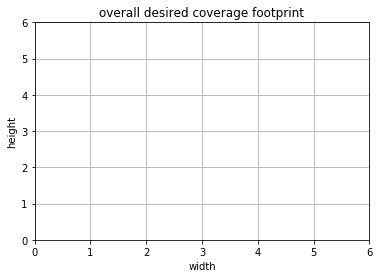

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('width')
plt.ylabel('height')
plt.title('overall desired coverage footprint')
plt.axis([0, 6, 0, 6])
plt.grid(True)
plt.show()